# Dealing with Null Values

Sometimes, DataFrames can contain missing values. This is most frequently encountered in datasets with missing or incomplete information, which is very common. However, it is also possible to create DataFrames programmatically with missing values, which we have seen before and will see in Lecture 6.

This notebook demonstrates some methods for dealing with missing values, and discussing which methods may be appropriate in different circumstances.

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [12]:
# For this notebook, we'll use a dataset of exoplanets: planets which have been
# discovered outside of our solar system
planet_df = pd.read_csv("https://raw.githubusercontent.com/CUNY-CISC-3225/datasets/main/planets.csv")

In [13]:
# Looking at the data, we see each row represents an exoplanet. The following
# columns are relevant for us:
#
#   - Method: The method used to discover the exoplanet
#   - Orbital period: The amount of time it takes to complete one full revolution
#                     around the exoplanet's sun
#   - Mass: The mass of the exoplanet
#   - Distance: How far, in light-years, the exoplanet is from Earth
#   - Year: The year the exoplanet was discovered
planet_df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [14]:
# Since we have never seen this dataset before, a useful first step is to see
# if any of the columns have missing values. One way we can do this is with the
# isna() method, which returns a new boolean DataFrame where columns have the value
# `False` if they are not null, and `True` if they are. We can see a few True
# values in the subset of the DataFrame below:
planet_df.isna()

,method,number,orbital_period,mass,distance,year
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1030,False,False,False,True,False,False
1031,False,False,False,True,False,False
1032,False,False,False,True,False,False
1033,False,False,False,True,False,False


In [15]:
# We can sum the result of isna() to get a count of missing values.
# We see that orbital_period, mass, and distance all have missing values,
# but mass has the most.
planet_df.isna().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [16]:
# Another way to find the number of missing values is to use the info() method.
# info() shows us a variety of information about our DataFrame.  It tells us
# what columns the DataFrame has, what types they are, the total number of rows,
# and how many non-null values exist in each column.
planet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


## Not-a-Number values and NumPy

Now that we see it is possible for a DataFrame to have missing values, we can look at the effect they have on computation in both NumPy and Pandas. Both libraries handle NaN values differently. We'll start by examining NumPy's behavior.

In [17]:
# Missing values are often represented by a value of NaN, or Not a Number.
# NaN values are technically floating point values - they are part of the
# floating point specification. We can create one in Python by casting the
# string "nan" to a float:
float("nan")

nan

In [18]:
# Because NaN is a special floating point number, we can do math with it.
# NaN values are infectious - the result of any mathematical operation performed
# on them is NaN:
print(float("nan") + 100)
print(float("nan") - 27)
print(float("nan") * 10)
print(float("nan") / 39)

nan
nan
nan
nan


In [19]:
# Even NaN * 0 is still NaN:
float("nan") * 0

nan

In [20]:
# Note that NaN is different from None!
# None is a special Python object that means "there is no value here."
# NaN is still considered a number. You cannot perform math on None objects.
None + 3

TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

In [21]:
# So what effect does this have on NumPy arrays?
# Arrays can contain a NaN value so long as the type of the array is floating
# point. Note that the array is created with integer values, but because NaN is
# a floating point value, all given integers are cast to floating point.
#
# Additionally, NumPy includes a NaN object np.nan as a convenience so you do
# not have to call float("nan") every time you want to use one.
np.array([1, 2, 3, np.nan])

array([ 1.,  2.,  3., nan])

In [22]:
# Based on what we saw before, we can expect the sum of this array to be NaN:
np.sum(np.array([1, 2, 3, np.nan]))

nan

In [23]:
# This is true of almost all mathematical functions. For example, we can't compute
# the mean because doing this requires us to sum all values in the array:
np.mean(np.array([1, 2, 3, np.nan]))

nan

In [24]:
# We can't find the maximum or minimum value, because doing so requires us to
# compare all values:
np.max(np.array([1, 2, 3, np.nan])), np.min(np.array([1, 2, 3, np.nan]))

(nan, nan)

In [25]:
# And we can't find the median because doing so requires us to sort the array,
# and this also requires comparing all values:
np.median(np.array([1, 2, 3, np.nan]))

nan

In [26]:
# Fortunately, NuPy has alternate versions of several math functions that
# explicitly ignore NaN values. For example, summing:
np.nansum(np.array([1, 2, 3, np.nan]))

6.0

In [27]:
# Finding the mean. Note that, in ignoring the NaN value, NumPy did not account
# for it when performing the average - it computed the average assuming only
# 3 elements in the array. Specifically, it computed the average as
# (1 + 2 + 3) / 3, NOT as (1 + 2 + 3) / 4.
np.nanmean(np.array([1, 2, 3, np.nan]))

2.0

In [28]:
# As we discussed previously, NaN is a floating point number and None is a Python
# object indicating the absence of a value. They are not the same. If we try
# to put a None object in a NumPy array, it will include the actual Python object
# itself in the array:

In [29]:
np.array([1, 2, 3, None])

array([1, 2, 3, None], dtype=object)

In [65]:
np.sum(np.array([1, 2, 3, np.nan]))

nan

In [30]:
# Summing will fail, because like we saw above, you cannot sum a number and the
# None object. We get the same error we received before when we tried to do it:
np.sum(np.array([1, 2, 3, None]))

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

## Not-a-Number values and Pandas

Pandas does not handle missing numbers the same way NumPy does. Here, we'll see how it's different.

In [31]:
# Like NumPy arrays, we can create Series objects with missing values:
pd.Series([1, 2, 3, np.nan])

0    1.0
1    2.0
2    3.0
3    NaN
dtype: float64

In [32]:
# Unlike NumPy, Pandas will interpret a value of None as NaN.
pd.Series([1, 2, 3, None])

0    1.0
1    2.0
2    3.0
3    NaN
dtype: float64

In [33]:
# However, it will only do this if the other values in the Series can be converted
# to a floating point number. Here, a Series of strings cannot be converted to
# floating point, so the type of the series is "object" and the None value remains.
pd.Series(["a", "b", "c", None])

0       a
1       b
2       c
3    None
dtype: object

In [34]:
# Unlike NumPy, Pandas objects ignore NaN values by default when performing
# math. Here, we see the call to mean() behaves the same way as it does in
# NumPy when calling nanmean() (i.e., mean() does not account for NaN when
# computing the average).
pd.Series([1, 2, 3, np.nan]).mean()

2.0

In [35]:
# The same is true of DataFrames. Here, we create a DataFrame containing many
# missing values. Note that, as with Series objects, the type of numeric columns
# containing NaN was converted to floating point.
df = pd.DataFrame([[1, np.nan, 2], [2, 3, 5], [np.nan, 4, 6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [36]:
# Performing math on the DataFrame as a whole behaves like math on Series objects.
# By default, Pandas ignores NaN values. For example, when finding the sum,
# we are only computing it over rows that do not contain NaN.
df.sum()

0     3.0
1     7.0
2    13.0
dtype: float64

## Dealing with missing values in Pandas

As we have seen, it is possible to perform math in Pandas without taking steps to address the missing values. However, in some circumstances, it may be advantageous to remove them. We will discuss why missing values could be a problem when we return to discussing the exoplanet dataset. For now, here are a few methods we can use to eliminate missing values.

In [37]:
# The dropna() method removes rows if they contain any missing values.
# Calling dropna() on the DataFrame we created above results in a new
# DataFrame with only one row: the row that contained valid values.
df.dropna()

,0,1,2
1,2.0,3.0,5


In [38]:
# Like many Pandas methods, dropna() has an axis parameter used to control
# whether the operation is performed row-wise or column-wise. As usual, it
# is 0 (row-wise) by default:
df.dropna(axis=0)

,0,1,2
1,2.0,3.0,5


In [39]:
# But we can also set it to 1 and drop all columns that contain missing
# values instead. Here is the result. Only column 2 of our DataFrame remains,
# because it is the only column which does not have missing values.
df.dropna(axis=1)

,2
0,2
1,5
2,6


In [40]:
# There are some situations where we may not mind some missing values, and are
# only concerned if most or all of values are missing from a row or column.
# dropna() allows us to control how strict it is with removing rows or columns.
# To demonstrate, let's create a new DataFrame with more missing values:
df = pd.DataFrame([[1, np.nan, np.nan], [2, np.nan, 5], [np.nan, np.nan, np.nan]])
df

,0,1,2
0,1.0,NaN,NaN
1,2.0,NaN,5.0
2,NaN,NaN,NaN


In [41]:
# The 'how' parameter is 'any' by default, meaning that Pandas will remove rows
# if they contain any missing values. As an alternative, we can set how='all'
# and Pandas will only remove rows that are missing all values:
df.dropna(how='all')

,0,1,2
0,1.0,NaN,NaN
1,2.0,NaN,5.0


In [42]:
# We can also use how='all' to only remove columns that are missing all values:
df.dropna(axis=1, how='all')

,0,2
0,1.0,NaN
1,2.0,5.0
2,NaN,NaN


In [43]:
# For very fine-grained control, we can use the 'thresh' option to say exactly
# how many non-null values we expect the result to have.
# Here, with thresh=0, nothing happens. We are saying "There must be at least 0
# non-null values in each row."
df.dropna(thresh=0)

,0,1,2
0,1.0,NaN,NaN
1,2.0,NaN,5.0
2,NaN,NaN,NaN


In [44]:
# With thresh=1, we are saying "There must be at least 1 non-null value in each row."
df.dropna(thresh=1)

,0,1,2
0,1.0,NaN,NaN
1,2.0,NaN,5.0


In [45]:
# With thresh=2, we are saying "There must be at least 2 non-null values in each row."
df.dropna(thresh=2)

,0,1,2
1,2.0,NaN,5.0


In [46]:
# Finally, with thresh=3, we are saying "There must be at least 3 non-null values
# in each row." Because no row in our DataFrame meets this requirement, the
# result is an empty DataFrame.
#
# Like other parameters, 'thresh' can be used with 'axis' to apply similar restrictions
# to columns.
df.dropna(thresh=3)

,0,1,2


In [66]:
df

,0,1,2
0,1.0,NaN,NaN
1,2.0,NaN,5.0
2,NaN,NaN,NaN


In [47]:
# Another option for dealing with missing values is to replace them with a value.
# If we want to do this, we can use the fillna() method to specify the value.
# Here, we are replacing all NaNs with 0:
df.fillna(0)

,0,1,2
0,1.0,0.0,0.0
1,2.0,0.0,5.0
2,0.0,0.0,0.0


In [48]:
# Here, we are replacing NaN with the mean value of each column. Note that
# column 1 remains NaN, because it does not have a column mean.
df.fillna(df.mean())

,0,1,2
0,1.0,NaN,5.0
1,2.0,NaN,5.0
2,1.5,NaN,5.0


In [49]:
# Another method of filling NaN values is to borrow values from adjacent
# elements. We can specify the 'ffill', or forward-fill method, which takes
# a replacement value from the previous row. Note the following:
#
#  - The NaN at column 0 row 2 was given the value of column 0 row 1.
#  - The NaN at column 2 row 2 was given the value of column 2 row 1.
#  - Column 1 remains NaN because there is no row containing any value to fill
#    forward.
#  - Column 2 row 0 remains NaN because 0 is the first row. There is no previous
#    row to take a value from.
df.fillna(method='ffill')

C:\Users\wangn\AppData\Local\Temp\ipykernel_18532\569993960.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill')


,0,1,2
0,1.0,NaN,NaN
1,2.0,NaN,5.0
2,2.0,NaN,5.0


In [50]:
# We can forward-fill across columns. Note the following:
#
#   - The NaN at column 1 row 0 was given the value of column 0 row 0.
#     Then, the next NaN at column 2 row 0 was given the new value of
#     column 1 row 0.
#   - Column 1 row 1 was given the value of column 0 row 1.
#   - Row 3 remains NaN because there is no column containing any value to fill
#     forward.
df.fillna(method='ffill', axis=1)

C:\Users\wangn\AppData\Local\Temp\ipykernel_18532\1884137286.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', axis=1)


,0,1,2
0,1.0,1.0,1.0
1,2.0,2.0,5.0
2,NaN,NaN,NaN


In [51]:
# We can also backwards-fill, which obtains a value from the subsequent row or
# column instead. Here it is with row-wise backfilling:
df.fillna(method='bfill')

C:\Users\wangn\AppData\Local\Temp\ipykernel_18532\2006656292.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill')


,0,1,2
0,1.0,NaN,5.0
1,2.0,NaN,5.0
2,NaN,NaN,NaN


In [52]:
# And column-wise backfilling:
df.fillna(method='bfill', axis=1)

C:\Users\wangn\AppData\Local\Temp\ipykernel_18532\1285552296.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', axis=1)


,0,1,2
0,1.0,NaN,NaN
1,2.0,5.0,5.0
2,NaN,NaN,NaN


In [53]:
# Note that filling forward and backward only makes sense for certain kinds of data.
# For example, if your data is time series (i.e., it tracks the changes in values
# over time), ffill and bfill are fine to use. However, if each row represents
# completely different unrelated values, you shouldn't use it.

## Revisiting the exoplanet dataset

Now, we apply some of these techniques to the exoplanet dataset.

In [54]:
# Here is why it might be useful to remove rows with missing values.
# When I compute the average exoplanet mass, what does it mean?
#
# It does not that the average exoplanet mass is about 2.6. It means that the
# average exoplanet mass of the planets with mass values is about 2.6.
planet_df['mass'].mean()

2.6381605847953216

In [55]:
# This is an important distinction to make because, while we know of 1,035
# exoplanets, only 513 of them have a mass!
planet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [56]:
# This can complicate an analysis. For example, if I want to compare the average
# exoplanet mass and the average exoplanet orbital period, the results aren't
# quite the same. Specifically, more planets have an orbital period than have a mass.
# That means that these numbers are the mean orbital period of the 992 planets with
# an orbital period, and the mean mass of the 513 planets with a mass.
planet_df['orbital_period'].mean(), planet_df['mass'].mean()

(2002.9175960947582, 2.6381605847953216)

In [57]:
# If we drop missing values, we are now guaranteeing that the mean of the orbital
# period involves the same set of planets as the mean of the mass.
planet_df.dropna()['orbital_period'].mean(), planet_df.dropna()['mass'].mean()

(835.778670671486, 2.5093200401606426)

<Axes: >

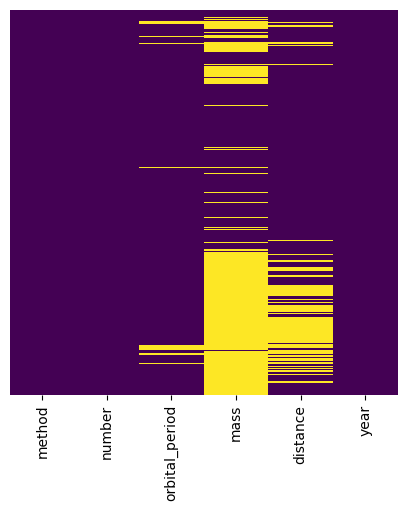

In [58]:
# We are actually missing some important information. We know how many values are
# missing in each column. But we don't know how much overlap there is.
#
# Here is a simple visualization that allows us to see where missing values are
# in the dataset. In the visualization, dark areas contain values and bright areas
# are missing.
#
# This helps us understand the extent of the damage if we call dropna(). We see
# that many mass values are missing that are also missing orbital period and distance.
# However, there are also rows that are only missing mass, mass and distance,
# and mass and orbital period.
plt.figure(figsize=(5, 5))
sns.heatmap(planet_df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

<Axes: >

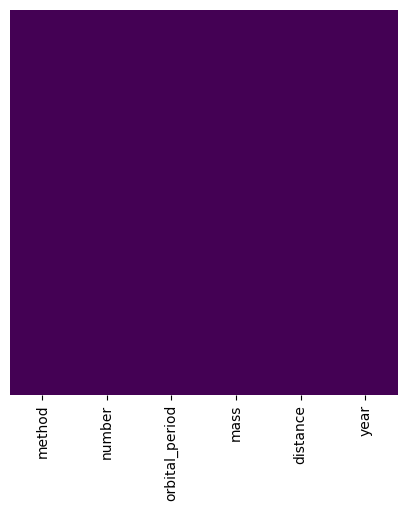

In [59]:
# Calling dropna() removes all rows, even if they are only missing one value.
# We can see that it has successfully eliminated all missing values, but how many
# rows with potentially useful information are gone?
plt.figure(figsize=(5, 5))
sns.heatmap(planet_df.dropna().isnull(), cbar=False, yticklabels=False, cmap='viridis')

<Axes: >

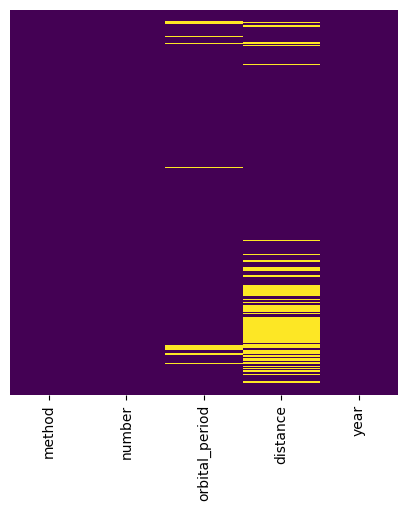

In [60]:
# Ultimately the right thing to do will depend on your dataset and your analysis
# goals. Here are some possible approaches for this dataset.
#
# If you are curious about all exoplanet characteristics other than mass,
# you could consider dropping the "mass" column (using the .drop() method)
# and then calling dropna() on the dataset. You can see that fewer rows will
# be removed than if "mass" were still in the dataset.
plt.figure(figsize=(5, 5))
sns.heatmap(planet_df.drop('mass', axis=1).isna(), cbar=False, yticklabels=False, cmap='viridis')

498

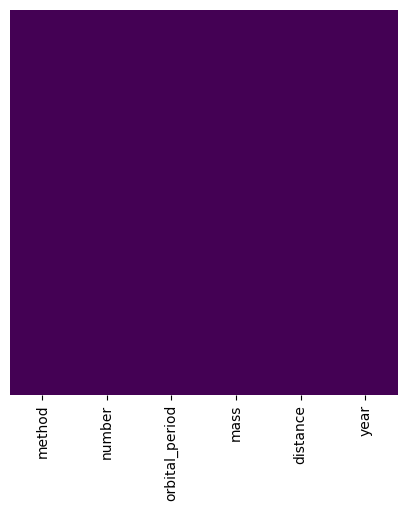

In [61]:
# If you plan to conduct an analysis that involves comparing all three values in
# mass, distance, and orbital period, it might be best to drop rows where all of
# them are missing, even if it results in a significant decrease in the size of
# the dataset.
plt.figure(figsize=(5, 5))
sns.heatmap(planet_df.dropna().isna(), cbar=False, yticklabels=False, cmap='viridis')
len(planet_df.dropna())

<Axes: >

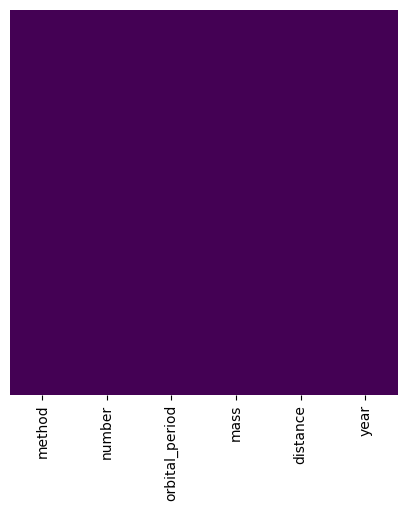

In [62]:
# You might consider filling values with the mean. However, for exoplanets, I
# am suspicious that unknown distances might be far away (i.e., it is harder to
# find and infer characteristics about far-away exoplanets). So filling with the
# mean may not be appropriate if my suspicion is correct.
plt.figure(figsize=(5, 5))
sns.heatmap(planet_df.fillna(planet_df[['orbital_period', 'distance', 'mass']].mean()).isna(), cbar=False, yticklabels=False, cmap='viridis')

In [63]:
# Forward and backwards fill does not make sense in this case. There does
# not appear to be any relationship between adjacent exoplanets in the dataset,
# so it doesn't make sense to take the mass of one planet and apply it to another.
planet_df

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [64]:
# Another point to consider: if your goal is to use your data to train a machine
# learning model, you must deal with null values. Many machine learning algorithms
# involve linear algebra, which cannot accept null values. In many cases, dropping
# rows with NaN is often the best solution, even if it reduces the size of the dataset.